<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#3


In [58]:
#5
class Trapezoid:
    def __init__(self, x, f):
        self.x = x
        self.f = f
        self.h = x[1] - x[0]
        self.y = f(x)

    def GetIntegral(self):
        self.Integral = 0.
        self.Integral += 0.5 * (self.y[0] + self.y[-1])
        self.Integral += np.sum(self.y[1:-1])
        return self.Integral * self.h

f = lambda x: np.exp(-x**2)
x = np.linspace(0, 1, 6)
#El número 6 surge del cálculo del error que da como resultado 5.77
trapezoid = Trapezoid(x, f)
integral = trapezoid.GetIntegral()
print(f"El valor aproximado de la integral es: {integral}")


El valor aproximado de la integral es: 0.7443683397636671


In [59]:
#6
R = 0.5
a = 0.01

def integrand(x):
    return np.sqrt(R**2 - x**2)

a_lim = -a
b_lim = a


n = 1001
x = np.linspace(a_lim, b_lim, n)
y = integrand(x)


h = (b_lim - a_lim) / (n - 1)
integral_simpson = y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])
integral_simpson *= h / 3

print(f"Integral usando la regla de Simpson: {integral_simpson}")


Integral usando la regla de Simpson: 0.009999333293327618


Volumen aproximado: 2.093846998333748


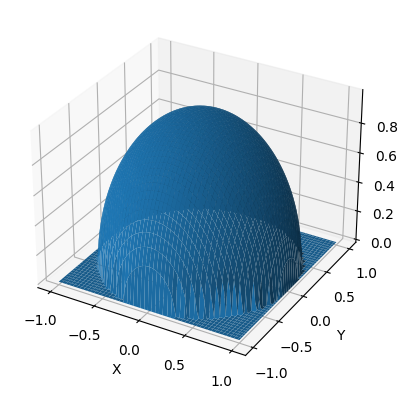

In [55]:
#7
def f(x, y, R):
  result = R**2 - x**2 - y**2
  return np.sqrt(result) if result >= 0 else 0

def volumen_semiesfera(R, n):
  x = np.linspace(-R, R, n+1)
  y = np.linspace(-R, R, n+1)
  X, Y = np.meshgrid(x, y)
  dx = x[1] - x[0]
  dy = y[1] - y[0]
  area = dx * dy
  volumen = 0

  for i in range(n):
    for j in range(n):
      z1 = f(X[i,j], Y[i,j], R)
      z2 = f(X[i+1,j], Y[i,j], R)
      z3 = f(X[i,j+1], Y[i,j], R)
      z4 = f(X[i+1,j+1], Y[i+1,j+1], R)
      promedio = (z1 + z2 + z3 + z4) / 4

      if np.all(promedio > 0):
        volumen += promedio * area

  return volumen
R = 1
n = 100
volumen_aprox = volumen_semiesfera(R, n)

print("Volumen aproximado:", volumen_aprox)

x = np.linspace(-R, R, n)
y = np.linspace(-R, R, n)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)
mascara = X**2 + Y**2 <= R**2
Z[mascara] = np.sqrt(R**2 - X[mascara]**2 - Y[mascara]**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [68]:
#9
import sympy as sp


x, a, b = sp.symbols('x a b')
h = (b - a) / 3


x0 = a
x1 = a + h
x2 = a + 2 * h
x3 = b


L0 = ((x - x1) * (x - x2) * (x - x3)) / ((x0 - x1) * (x0 - x2) * (x0 - x3))
L1 = ((x - x0) * (x - x2) * (x - x3)) / ((x1 - x0) * (x1 - x2) * (x1 - x3))
L2 = ((x - x0) * (x - x1) * (x - x3)) / ((x2 - x0) * (x2 - x1) * (x2 - x3))
L3 = ((x - x0) * (x - x1) * (x - x2)) / ((x3 - x0) * (x3 - x1) * (x3 - x2))

L0_simplified = sp.simplify(L0)
L1_simplified = sp.simplify(L1)
L2_simplified = sp.simplify(L2)
L3_simplified = sp.simplify(L3)

print(L0_simplified)
print(L1_simplified)
print(L2_simplified)
print(L3_simplified)

x1_simplified = sp.simplify(a + h)
x2_simplified = sp.simplify(a + 2 * h)


print("Punto b:",x1_simplified, x2_simplified)


-(b - x)*(a + 2*b - 3*x)*(2*a + b - 3*x)/(2*(a - b)**3)
9*(a - x)*(b - x)*(a + 2*b - 3*x)/(2*(a - b)**3)
-9*(a - x)*(b - x)*(2*a + b - 3*x)/(2*(a - b)**3)
(a - x)*(a + 2*b - 3*x)*(2*a + b - 3*x)/(2*(a - b)**3)
Punto b: 2*a/3 + b/3 a/3 + 2*b/3


In [61]:
#10
import sympy as sp

x, h = sp.symbols('x h')
integrand = x * (x - h) * (x - 2*h) * (x - 3*h)
integral = sp.integrate(integrand, (x, 0, 3*h))
integral_simplified = sp.simplify(integral)
f4 = sp.Function('f4')(sp.Symbol('xi'))
error = (f4 / sp.factorial(4)) * integral_simplified
error_simplified = sp.simplify(error)

integral_simplified, error_simplified


(-9*h**5/10, -3*h**5*f4(xi)/80)

In [62]:
#15
import sympy as sym

x = sym.Symbol('x', Real=True)
def GetLegendre(n):
    y = (x**2 - 1)**n
    p = sym.diff(y, x, n) / (2**n * np.math.factorial(n))
    return p

def GetNewtonMethod(f, df, xn, itmax=10000, precision=1e-14):
    error = 1.0
    it = 0
    while error >= precision and it < itmax:
        try:
            xn1 = xn - f(xn) / df(xn)
            error = np.abs((xn1 - xn) / xn)
        except ZeroDivisionError:
            print("Zero division error")
        xn = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

def GetAllRoots(f, df, x, tolerancia=13):
    Roots = np.array([])
    for i in x:
        root = GetNewtonMethod(f, df, i)
        if root != False:
            croot = np.round(root, tolerancia)
            if croot not in Roots:
                Roots = np.append(Roots, croot)
    Roots.sort()
    return Roots

def GetRootsPolynomial(n, xi, poly, dpoly):
    pn = sym.lambdify([x], poly[n], 'numpy')
    dpn = sym.lambdify([x], dpoly[n], 'numpy')
    Roots = GetAllRoots(pn, dpn, xi)
    return Roots


def GetWeights(Roots, Dpoly):
    Weights = np.array([])
    dpn = sym.lambdify([x], Dpoly[n], 'numpy')
    for r in Roots:
        Weights = np.append(Weights, 2 / ((1 - r**2) * dpn(r)**2))
    return Weights

Legendre = []
DLegendre = []
n = 20
for i in range(n + 1):
    poly = GetLegendre(i)
    Legendre.append(poly)
    DLegendre.append(sym.diff(poly, x))

Roots_list = []
Weights_list = []
for i in range(1, n + 1):
    roots, weights = np.polynomial.legendre.leggauss(i)
    Roots_list.append(roots)
    Weights_list.append(weights)


for i in range(n):
    print(f"Polinomio de Legendre P_{i+1}:")
    print(f"Raíces: {Roots_list[i]}")
    print(f"Pesos: {Weights_list[i]}")
    print()


<ipython-input-62-45fa393175f3>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y, x, n) / (2**n * np.math.factorial(n))


Polinomio de Legendre P_1:
Raíces: [0.]
Pesos: [2.]

Polinomio de Legendre P_2:
Raíces: [-0.57735027  0.57735027]
Pesos: [1. 1.]

Polinomio de Legendre P_3:
Raíces: [-0.77459667  0.          0.77459667]
Pesos: [0.55555556 0.88888889 0.55555556]

Polinomio de Legendre P_4:
Raíces: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Pesos: [0.34785485 0.65214515 0.65214515 0.34785485]

Polinomio de Legendre P_5:
Raíces: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Pesos: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]

Polinomio de Legendre P_6:
Raíces: [-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
Pesos: [0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]

Polinomio de Legendre P_7:
Raíces: [-0.94910791 -0.74153119 -0.40584515  0.          0.40584515  0.74153119
  0.94910791]
Pesos: [0.12948497 0.27970539 0.38183005 0.41795918 0.38183005 0.27970539
 0.12948497]

Polinomio de Legendre P_8:
Raíces: [-0.96028986 -0.7966664

In [63]:
#16

f1 = lambda x: 1 / (x**4 + 1)
f2 = lambda u: u**3 / (1 + u**4)
n = 4
roots = GetRootsPolynomial(n, Roots_list[n-1], Legendre, DLegendre)
weights = GetWeights(roots, DLegendre)
t1 = 0.5 * (roots + 1)
w1 = 0.5 * weights
integral1 = np.sum(w1 * f1(t1))
integral2 = np.sum(w1 * f2(t1))
integral_total = integral1 + integral2

print(f"Valor aproximado de la integral: {integral_total:.6f}")


Valor aproximado de la integral: 1.040310


Valor aproximado de la integral: 0.481130


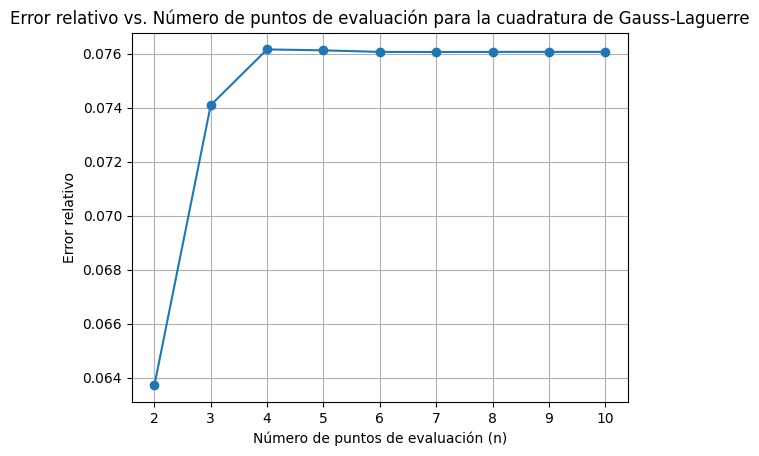

In [64]:
#17
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: (x**3) / (np.exp(x) - 1)

xk = np.array([0.4157745568, 2.2942803603, 6.2899450829])
wk = np.array([0.7110930099, 0.2785177336, 0.0103892565])

integral = np.sum(wk * f(xk))

print(f"Valor aproximado de la integral: {integral:.6f}")

I_exact = (np.pi**4) / 15

def gauss_laguerre(n):
    xk, wk = np.polynomial.laguerre.laggauss(n)
    return xk, wk

n_values = np.arange(2, 11)
errors = []

for n in n_values:
    xk, wk = gauss_laguerre(n)
    I_estimated = np.sum(wk * f(xk))
    error = I_estimated / I_exact
    errors.append(error)

plt.plot(n_values, errors, marker='o')
plt.xlabel('Número de puntos de evaluación (n)')
plt.ylabel('Error relativo')
plt.title('Error relativo vs. Número de puntos de evaluación para la cuadratura de Gauss-Laguerre')
plt.grid(True)
plt.show()



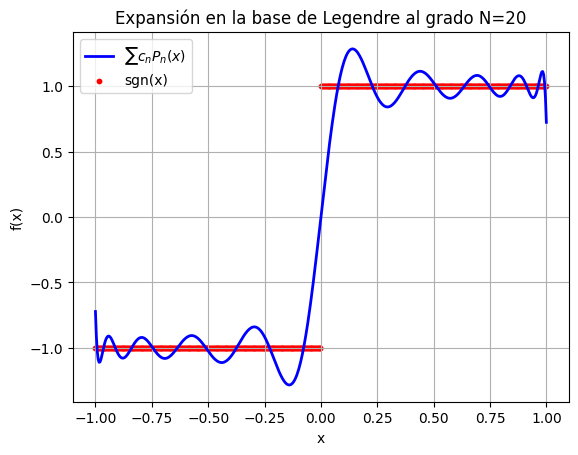

In [69]:
21#
from numpy.polynomial.legendre import leggauss, Legendre

def sgn(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))


x_vals = np.linspace(-1, 1, 500)
y_vals = sgn(x_vals)


N = 20
x_gauss, w_gauss = leggauss(N)


polynomials = [Legendre.basis(n) for n in range(N + 1)]

def compute_cn(n, x_gauss, w_gauss):
    integrand = sgn(x_gauss) * polynomials[n](x_gauss)
    return (2 * n + 1) / 2 * np.sum(integrand * w_gauss)


c_vals = np.array([compute_cn(n, x_gauss, w_gauss) for n in range(N + 1)])

def legendre_expansion(x, c_vals, polynomials):
    expansion = np.zeros_like(x)
    for n, c_n in enumerate(c_vals):
        expansion += c_n * polynomials[n](x)
    return expansion

y_expansion = legendre_expansion(x_vals, c_vals, polynomials)

plt.plot(x_vals, y_expansion, label=r'$\sum c_n P_n(x)$', color='blue', lw=2)
plt.scatter(x_vals, y_vals, color='red', label='sgn(x)', s=10)


plt.title('Expansión en la base de Legendre al grado N=20')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend(loc='best')


plt.show()

In [66]:
#DESAFIO
